Missing values:
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
Cleaned dataset:
    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


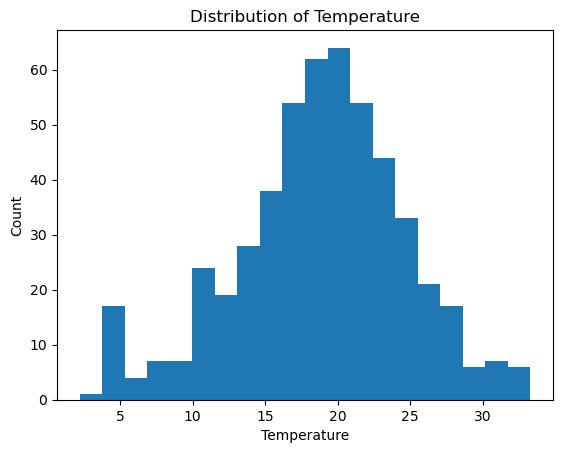

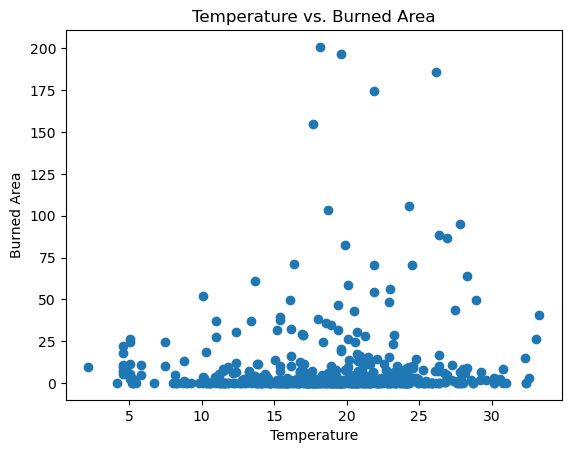

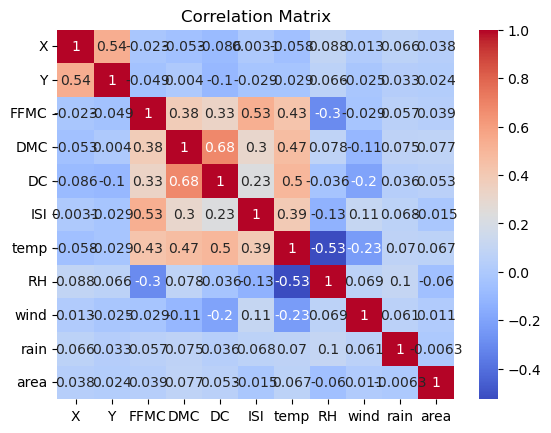

Linear Regression MSE and R2 Score: 188.29825621722918 -0.07112919490253278
Random Forest Regression MSE and R2 Score: 258.2119579053496 -0.46883126876273784


In [11]:
# Slide 2: Data Cleaning and Preprocessing
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('forrestfires.csv')

# Checking for missing values
print("Missing values:\n", data.isnull().sum())

# Handling missing values (if any)
data = data.dropna()

# Handling outliers (if any)
data = data[(np.abs(data['area'] - data['area'].mean()) / data['area'].std()) < 3]

# Display the cleaned dataset
print("Cleaned dataset:\n", data.head())


# Slide 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of temperature
plt.hist(data['temp'], bins=20)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()

# Scatter plot of temperature vs. burned area
plt.scatter(data['temp'], data['area'])
plt.xlabel('Temperature')
plt.ylabel('Burned Area')
plt.title('Temperature vs. Burned Area')
plt.show()


# Slide 4: Feature Selection and Engineering
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Selecting influential features
selected_features = ['FFMC', 'DMC', 'DC', 'temp', 'RH', 'wind']

# Engineering new feature: temperature squared
data['temp_squared'] = data['temp'] ** 2

# Slide 5: Machine Learning Algorithms - Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = data[selected_features]
y = data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Training a Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Evaluating the models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
mse_lr = mean_squared_error(y_test, lr_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_lr = r2_score(y_test, lr_predictions)
r2_rf = r2_score(y_test, rf_predictions)

print("Linear Regression MSE and R2 Score:", mse_lr, r2_lr)
print("Random Forest Regression MSE and R2 Score:", mse_rf, r2_rf)





In [12]:
# Slide 6: Machine Learning Algorithms - Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Creating a binary target variable for classification
data['fire_class'] = np.where(data['area'] > 0, 1, 0)

# Splitting the data into training and testing sets
X = data[selected_features]
y = data['fire_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Training a Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Evaluating the models
dt_predictions = dt_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_predictions)
accuracy_svc = accuracy_score(y_test, svc_predictions)
precision_dt = precision_score(y_test, dt_predictions)
precision_svc = precision_score(y_test, svc_predictions)
recall_dt = recall_score(y_test, dt_predictions)
recall_svc = recall_score(y_test, svc_predictions)

print("Decision Tree Classifier Accuracy, Precision, and Recall:", accuracy_dt, precision_dt, recall_dt)
print("Support Vector Classifier Accuracy, Precision, and Recall:", accuracy_svc, precision_svc, recall_svc)


Decision Tree Classifier Accuracy, Precision, and Recall: 0.5242718446601942 0.4807692307692308 0.5319148936170213
Support Vector Classifier Accuracy, Precision, and Recall: 0.5436893203883495 0.5 0.8723404255319149


/Users/kei/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kei/opt/a

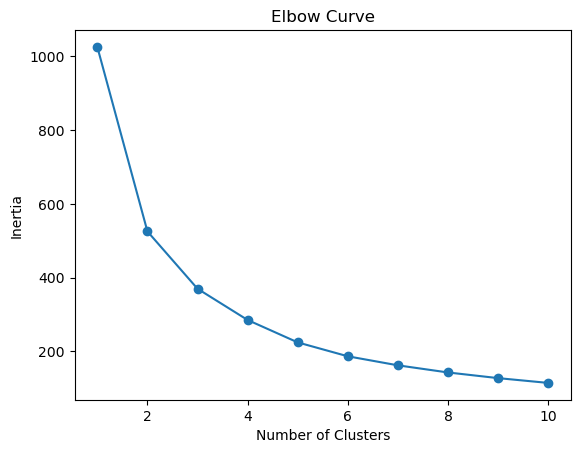

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:

# Slide 7: K-means Clustering
from sklearn.cluster import KMeans

# Selecting features for clustering
clustering_features = ['temp', 'RH']

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[clustering_features])

# Determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Performing K-means clustering with the selected number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_



In [13]:
# Slide 8: Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Selecting features for Naive Bayes
nb_features = ['FFMC', 'DMC', 'DC', 'temp', 'RH', 'wind']

# Splitting the data into training and testing sets
X = data[nb_features]
y = data['fire_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluating the model
nb_predictions = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_predictions)
precision_nb = precision_score(y_test, nb_predictions)
recall_nb = recall_score(y_test, nb_predictions)

print("Naive Bayes Classifier Accuracy, Precision, and Recall:", accuracy_nb, precision_nb, recall_nb)


Naive Bayes Classifier Accuracy, Precision, and Recall: 0.49514563106796117 0.47058823529411764 0.851063829787234


In [ ]:

# Slide 9: Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the neural network model
nn_model = Sequential()
nn_model.add(Dense(16, activation='relu', input_dim=len(selected_features)))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compiling and training the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluating the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print("Neural Network Loss and Accuracy:", nn_loss, nn_accuracy)